# Chapter-1

## 简介

  > The new form of the prolem can be described in terms of a game which we call the "imitation game". It is played with three people,
a man(A), a woman(B), and an interroagtor(C) who may be of either sex. The interragator stays in a room a part fron the other tow.The
object of the game for the interrogator is to determine which of the other two is the man and which is the woman.
    We now ask the question, "What will happen when a machine takes the part A in this game?" Will the interrogator decide wrongly 
as often when the game is played like this as he does when the game is played between a man and a woman ? These questions replace our original, 
"Can machines think?"

- 许多机器学习系统解决的都是无法直接使用固定规则或者流程代码完成的问题。
- 具备“学习”能力的程序都是指它能够不断的从经历和数据中西区经验教训，从而应对未来的预测任务。我们把这种对未知的预测能力叫做泛化力（Generalization）
- 具备不断改善自身应对具体任务的能力。这种完成任务的能力叫性能（Performance）

> 机器学习定义(Tom Mitchell): <br>
A program can be said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T ,as measured by
    P , improves with experience E.

## 良/恶性乳腺癌肿瘤预测

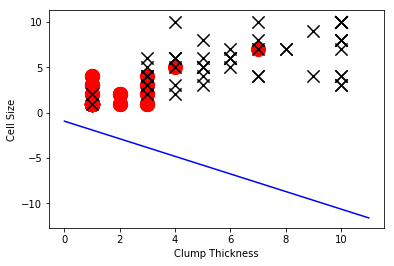

c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy(10 training samples): 0.8685714285714285
[-1.51522787]
[-0.10721332  0.48314152]


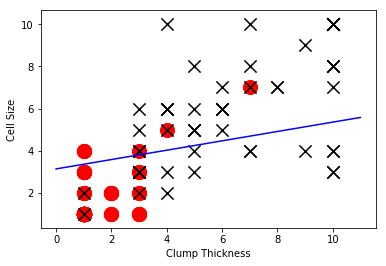

c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing accuracy(10 training samples): 0.9371428571428572
[-4.67611309]
[0.59071861 0.7498354 ]


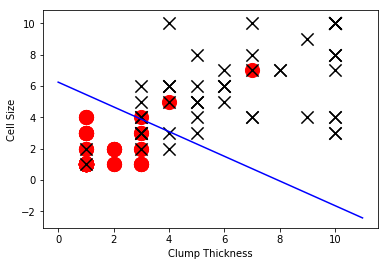

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv('./Datasets/Breast-Cancer/breast-cancer-train.csv')
# print(df_train)

df_test = pd.read_csv('./Datasets/Breast-Cancer/breast-cancer-test.csv')
# print(df_test)

df_test_negative = df_test.loc[df_test['Type'] == 0][[
    'Clump Thickness', 'Cell Size'
]]
df_test_positive = df_test.loc[df_test['Type'] == 1][[
    'Clump Thickness', 'Cell Size'
]]
# print(df_test_negative)
# print(df_test_positive)

plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

# 绘制随机直线
# 截距
intercept = np.random.random([1])
# 系数
coef = np.random.random([2])
# print(intercept)
# print(coef)
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
plt.plot(lx, ly, c='blue')

# 第一次绘制，随意一条直线
plt.show()

# =====================引入逻辑斯蒂回归分类器：使用一小部分的训练集的数据看看初步效果=============================
lr = LogisticRegression()
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy(10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']],df_test['Type']))

intercept = lr.intercept_
coef = lr.coef_[0,:]
print(intercept)
print(coef)
ly = (-intercept - lx * coef[0]) / coef[1]


plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.plot(lx, ly, c='blue')
# 引入逻辑回归算法生成的系数之后，虽然只用了小部分的训练数据，但区分效果已经好多了
plt.show()



# =====================引入逻辑斯蒂回归分类器：使用全部的训练集的数据看看最终效果=============================
lr = LogisticRegression()
lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Testing accuracy(10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']],df_test['Type']))

intercept = lr.intercept_
coef = lr.coef_[0,:]
print(intercept)
print(coef)
ly = (-intercept - lx * coef[0]) / coef[1]


plt.scatter(
    df_test_negative['Clump Thickness'],
    df_test_negative['Cell Size'],
    marker='o',
    s=200,
    c='red')
plt.scatter(
    df_test_positive['Clump Thickness'],
    df_test_positive['Cell Size'],
    marker='x',
    s=150,
    c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.plot(lx, ly, c='blue')
# 引入逻辑回归算法生成的系数之后，虽然只用了小部分的训练数据，但区分效果已经好多了
plt.show()



# Chapter-2

## 监督学习

### 获取在线数据、清除维度缺失数据

In [64]:
# 导入pandas与numpy工具包。
import pandas as pd
import numpy as np

pd.set_option("max_columns",1000) 
pd.set_option("display.width",400)

# 创建特征列表。
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# 使用pandas.read_csv函数从互联网读取指定数据。
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = column_names )

# 将?替换为标准缺失值表示。
data = data.replace(to_replace='?', value=np.nan)
# 丢弃带有缺失值的数据（只要有一个维度有缺失）。
data = data.dropna(how='any')

# 输出data的数据量和维度。
data.shape
print(data)

     Sample code number  Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
0               1000025                5                        1                         1                  1                            2           1                3                1        1      2
1               1002945                5                        4                         4                  5                            7          10                3                2        1      2
2               1015425                3                        1                         1                  1                            2           2                3                1        1      2
3               1016277                6                        8                         8                  1                            3           4                3                7       

### 线性分类器：逻辑斯蒂回归模型、随机参数估计模型

In [450]:
# 使用sklearn.cross_valiation里的train_test_split模块用于分割数据。
# train_test_split 包路径改了
from sklearn.model_selection import train_test_split

# 随机采样25%的数据用于测试，剩下的75%用于构建训练集合。
X_train, X_test, y_train, y_test = train_test_split(data[column_names[1:10]], data[column_names[10]], test_size=0.25, random_state=33)

print(type(X_train))
print(type(y_train))
print(data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 测试集合里面肿瘤数据统计分布
print(y_train.value_counts())
print(y_test.value_counts())
print(type(y_test))
print(y_test.head())
print("=" * 64)
print(X_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(683, 11)
(512, 9)
(171, 9)
(512,)
(171,)
2    344
4    168
Name: Class, dtype: int64
2    100
4     71
Name: Class, dtype: int64
<class 'pandas.core.series.Series'>
657    2
257    2
236    4
697    4
599    2
Name: Class, dtype: int64
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses
662                1                        1                         3                  1                            2           1                2                1        1
282                1                        4                         3                 10                            4          10                5                6        1
542                5                        3                         1                  1                            2           1                1                

In [94]:
# 从sklearn.preprocessing里导入StandardScaler。
from sklearn.preprocessing import StandardScaler
# 从sklearn.linear_model里导入LogisticRegression与SGDClassifier。
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

[[-1.19196677 -0.68788787 -0.03809494 ... -0.55666054 -0.58626819
  -0.34343195]
 [-1.19196677  0.30608745 -0.03809494 ...  0.68611648  1.09441105
  -0.34343195]
 [ 0.24231522 -0.02523765 -0.72246721 ... -0.97091955 -0.58626819
  -0.34343195]
 ...
 [ 0.24231522 -0.68788787 -0.38028108 ... -0.97091955 -0.58626819
  -0.34343195]
 [-1.19196677 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 0.95945621 -0.02523765 -0.38028108 ...  0.68611648  0.42213936
   1.42674078]]
(512, 9)
[[ 0.24231522  0.30608745  0.64627733 ... -0.14240153  1.09441105
  -0.34343195]
 [-0.47482578 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 2.03516771  1.63138788  1.67283574 ...  0.27185747  1.76668275
   4.96708623]
 ...
 [-0.11625528 -0.68788787 -0.72246721 ... -0.55666054 -0.58626819
  -0.34343195]
 [ 2.03516771  1.96271298  1.67283574 ...  1.51463449  2.43895444
   0.8366832 ]
 [ 2.03516771  0.30608745  1.3306496  ...  1.10037549 -0.58626819
  -0.34343195]]
(171, 9

In [100]:
# 初始化LogisticRegression与SGDClassifier。
lr = LogisticRegression()
sgdc = SGDClassifier()

# 调用LogisticRegression中的fit函数/模块用来训练模型参数。
lr.fit(X_train, y_train)
# 使用训练好的模型lr对X_test进行预测，结果储存在变量lr_y_predict中。
lr_y_predict = lr.predict(X_test)
print(lr_y_predict)
print(lr_y_predict.shape)
# 调用SGDClassifier中的fit函数/模块用来训练模型参数。
sgdc.fit(X_train, y_train)
# 使用训练好的模型sgdc对X_test进行预测，结果储存在变量sgdc_y_predict中。
sgdc_y_predict = sgdc.predict(X_test)



[2 2 4 4 2 2 2 4 2 2 2 2 4 2 4 4 4 4 4 2 2 4 4 2 4 4 2 2 4 4 4 4 4 4 4 4 2
 4 4 4 4 4 2 4 2 2 4 2 2 4 4 2 2 2 4 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2
 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 4
 2 2 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 4 2 4 2 4 2 2 2 2
 2 4 4 2 4 4 2 4 2 2 2 2 4 4 4 2 4 2 2 4 2 4 4]
(171,)


c:\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [104]:
# 从sklearn.metrics里导入classification_report模块。
from sklearn.metrics import classification_report

# 使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果。
print('Accuracy of LR Classifier:', lr.score(X_test, y_test))
print("=========================================================")
# 利用classification_report模块获得LogisticRegression其他三个指标的结果。
print(classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))
print("=========================================================")
 # 使用随机梯度下降模型自带的评分函数score获得模型在测试集上的准确性结果。
print('Accuarcy of SGD Classifier:', sgdc.score(X_test, y_test))
# 利用classification_report模块获得SGDClassifier其他三个指标的结果。
print(classification_report(y_test, sgdc_y_predict, target_names=['Benign', 'Malignant']))


Accuracy of LR Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       100
   Malignant       0.99      0.99      0.99        71

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuarcy of SGD Classifier: 0.9883040935672515
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99       100
   Malignant       0.97      1.00      0.99        71

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### 支持向量机分类器 support vector classifier

In [128]:
# 从sklearn.datasets里导入手写体数字加载器。
from sklearn.datasets import load_digits
# 从通过数据加载器获得手写体数字的数码图像数据并储存在digits变量中。
digits = load_digits()
print(digits)
print(digits['data'][2])
print(digits['target'][2])
# 检视数据规模和特征维度。
print(digits.data.shape)
print(digits['data'].shape)
print(digits['target'].shape)
print(digits.target_names)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [122]:
# 从sklearn.cross_validation中导入train_test_split用于数据分割。
from sklearn.model_selection import train_test_split

# 随机选取75%的数据作为训练样本；其余25%的数据作为测试样本。
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [123]:
# 从sklearn.preprocessing里导入数据标准化模块。
from sklearn.preprocessing import StandardScaler

# 从sklearn.svm里导入基于线性假设的支持向量机分类器LinearSVC。
from sklearn.svm import LinearSVC

# 从仍然需要对训练和测试的特征数据进行标准化。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 初始化线性假设的支持向量机分类器LinearSVC。
lsvc = LinearSVC()
#进行模型训练
lsvc.fit(X_train, y_train)
# 利用训练好的模型对测试样本的数字类别进行预测，预测结果储存在变量y_predict中。
y_predict = lsvc.predict(X_test)


c:\python36-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [124]:
# 使用模型自带的评估函数进行准确性测评。
print('The Accuracy of Linear SVC is', lsvc.score(X_test, y_test))

The Accuracy of Linear SVC is 0.9533333333333334


In [136]:
# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
from sklearn.metrics import classification_report
print(digits.target_names.astype(str))
print ( classification_report(y_test, y_predict, target_names=digits.target_names.astype(str)) )
print ( classification_report(y_test, y_predict  ) )

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00      0.99        44
           3       0.93      0.93      0.93        46
           4       0.97      1.00      0.99        35
           5       0.94      0.94      0.94        48
           6       0.96      0.98      0.97        51
           7       0.92      1.00      0.96        35
           8       0.98      0.84      0.91        58
           9       0.95      0.91      0.93        44

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.96      0.95       450
weighted avg       0.95      0.95      0.95       450

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00   

### 朴素贝叶斯分类器

In [137]:
# 从sklearn.datasets里导入新闻数据抓取器fetch_20newsgroups。
from sklearn.datasets import fetch_20newsgroups
# 与之前预存的数据不同，fetch_20newsgroups需要即时从互联网下载数据。
news = fetch_20newsgroups(subset='all')
# 查验数据规模和细节。
print(len(news.data))
print( news.data[0])


18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [141]:
# 从sklearn.cross_validation 导入 train_test_split。
from sklearn.model_selection import train_test_split
# 随机采样25%的数据样本作为测试集。
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=33)


In [142]:
# 从sklearn.feature_extraction.text里导入用于文本特征向量转化模块。详细介绍请读者参考3.1.1.1 特征抽取一节。
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# 从sklearn.naive_bayes里导入朴素贝叶斯模型。
from sklearn.naive_bayes import MultinomialNB

# 从使用默认配置初始化朴素贝叶斯模型。
mnb = MultinomialNB()
# 利用训练数据对模型参数进行估计。
mnb.fit(X_train, y_train)
# 对测试样本进行类别预测，结果存储在变量y_predict中。
y_predict = mnb.predict(X_test)


In [144]:
# 从sklearn.metrics里导入classification_report用于详细的分类性能报告。
from sklearn.metrics import classification_report
print('The accuracy of Naive Bayes Classifier is', mnb.score(X_test, y_test))
print( classification_report(y_test, y_predict, target_names = news.target_names))
print( classification_report(y_test, y_predict))

The accuracy of Naive Bayes Classifier is 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
              

### K近邻(分类)

In [151]:
# 从sklearn.datasets 导入 iris数据加载器。
from sklearn.datasets import load_iris
# 使用加载器读取数据并且存入变量iris。
iris = load_iris()
# 查验数据规模。
print(iris.data.shape)

print(iris.data[:5])

print(iris.DESCR)



(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal w

In [155]:
# 从sklearn.cross_validation里选择导入train_test_split用于数据分割。
from sklearn.model_selection import train_test_split
# 从使用train_test_split，利用随机种子random_state采样25%的数据作为测试集。
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=33)
print(iris.target)
# 結果0 1 2 代表了3中不同的亚种分类

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [156]:
# 从sklearn.preprocessing里选择导入数据标准化模块。
from sklearn.preprocessing import StandardScaler
# 从sklearn.neighbors里选择导入KNeighborsClassifier，即K近邻分类器。
from sklearn.neighbors import KNeighborsClassifier

# 对训练和测试的特征数据进行标准化。
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 使用K近邻分类器对测试数据进行类别预测，预测结果储存在变量y_predict中。
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)


In [157]:
# 使用模型自带的评估函数进行准确性测评。
print('The accuracy of K-Nearest Neighbor Classifier is', knc.score(X_test, y_test) )

# 依然使用sklearn.metrics里面的classification_report模块对预测结果做更加详细的分析。
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=iris.target_names) )


The accuracy of K-Nearest Neighbor Classifier is 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

   micro avg       0.89      0.89      0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



### 决策树-（分类-泰坦尼克）

In [158]:
# 导入pandas用于数据分析。
import pandas as pd
# 利用pandas的read_csv模块直接从互联网收集泰坦尼克号乘客数据。
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')


In [159]:
# 观察一下前几行数据，可以发现，数据种类各异，数值型、类别型，甚至还有缺失数据。
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [160]:
# 使用pandas，数据都转入pandas独有的dataframe格式（二维数据表格），直接使用info()，查看数据的统计特性。
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 71.8+ KB


In [166]:
# 机器学习有一个不太被初学者重视，并且耗时，但是十分重要的一环，特征的选择，这个需要基于一些背景知识。根据我们对这场事故的了解，sex, age, pclass这些都很有可能是决定幸免与否的关键因素。
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

# 对当前选择的特征进行探查。
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


In [167]:
# 借由上面的输出，我们设计如下几个数据处理的任务：
# 1) age这个数据列，只有633个，需要补完。
# 2) sex 与 pclass两个数据列的值都是类别型的，需要转化为数值特征，用0/1代替。

# 首先我们补充age里的数据，使用平均数或者中位数都是对模型偏离造成最小影响的策略。
X['age'].fillna(X['age'].mean(), inplace=True)

c:\python36-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [168]:
# 对补完的数据重新探查。
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       1313 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


In [183]:
# 由此得知，age特征得到了补完。

# 数据分割。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

In [184]:
# 我们使用scikit-learn.feature_extraction中的特征转换器，详见3.1.1.1特征抽取。
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

# 转换特征后，我们发现凡是类别型的特征都单独剥离出来，独成一列特征，数值型的则保持不变。
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
print(X_train)

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']
[[31.19418104  0.          0.          1.          0.          1.        ]
 [31.19418104  1.          0.          0.          1.          0.        ]
 [31.19418104  0.          0.          1.          0.          1.        ]
 ...
 [12.          0.          1.          0.          1.          0.        ]
 [18.          0.          1.          0.          0.          1.        ]
 [31.19418104  0.          0.          1.          1.          0.        ]]


In [185]:
# 同样需要对测试数据的特征进行转换。
X_test = vec.transform(X_test.to_dict(orient='record'))

In [186]:
# 从sklearn.tree中导入决策树分类器。
from sklearn.tree import DecisionTreeClassifier
# 使用默认配置初始化决策树分类器。
dtc = DecisionTreeClassifier()
# 使用分割到的训练数据进行模型学习。
dtc.fit(X_train, y_train)
# 用训练好的决策树模型对测试特征数据进行预测。
y_predict = dtc.predict(X_test)


In [187]:
# 从sklearn.metrics导入classification_report。
from sklearn.metrics import classification_report
# 输出预测准确性。
print(dtc.score(X_test, y_test))
# 输出更加详细的分类性能。
print(classification_report(y_predict, y_test, target_names = ['died', 'survived']))

0.7811550151975684
              precision    recall  f1-score   support

        died       0.91      0.78      0.84       236
    survived       0.58      0.80      0.67        93

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.81      0.78      0.79       329



### 集成模型（分类）

In [188]:
# 导入pandas，并且重命名为pd。
import pandas as pd

# 通过互联网读取泰坦尼克乘客档案，并存储在变量titanic中。
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')


In [189]:
# 人工选取pclass、age以及sex作为判别乘客是否能够生还的特征。
X = titanic[['pclass', 'age', 'sex']]
y = titanic['survived']

In [190]:
# 对于缺失的年龄信息，我们使用全体乘客的平均年龄代替，这样可以在保证顺利训练模型的同时，尽可能不影响预测任务。
X['age'].fillna(X['age'].mean(), inplace=True)

c:\python36-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [194]:
# 对原始数据进行分割，25%的乘客数据用于测试。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

In [195]:
# 对类别型特征进行转化，成为特征向量。
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))


In [196]:
# 使用单一决策树进行模型训练以及预测分析。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)


In [197]:
# 使用随机森林分类器进行集成模型的训练以及预测分析。
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)


c:\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [198]:
# 使用梯度提升决策树进行集成模型的训练以及预测分析。
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)


In [199]:
# 从sklearn.metrics导入classification_report。
from sklearn.metrics import classification_report

# 输出单一决策树在测试集上的分类准确性，以及更加详细的精确率、召回率、F1指标。
print('The accuracy of decision tree is', dtc.score(X_test, y_test))
print( classification_report(dtc_y_pred, y_test))


The accuracy of decision tree is 0.7811550151975684
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       236
           1       0.58      0.80      0.67        93

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.79      0.75       329
weighted avg       0.81      0.78      0.79       329



In [200]:
# 输出随机森林分类器在测试集上的分类准确性，以及更加详细的精确率、召回率、F1指标。
print('The accuracy of random forest classifier is', rfc.score(X_test, y_test))
print(classification_report(rfc_y_pred, y_test))

The accuracy of random forest classifier is 0.7781155015197568
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       235
           1       0.58      0.79      0.67        94

   micro avg       0.78      0.78      0.78       329
   macro avg       0.74      0.78      0.75       329
weighted avg       0.81      0.78      0.79       329



In [201]:
# 输出梯度提升决策树在测试集上的分类准确性，以及更加详细的精确率、召回率、F1指标。
print('The accuracy of gradient tree boosting is', gbc.score(X_test, y_test))
print(classification_report(gbc_y_pred, y_test))

The accuracy of gradient tree boosting is 0.790273556231003
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       239
           1       0.58      0.82      0.68        90

   micro avg       0.79      0.79      0.79       329
   macro avg       0.75      0.80      0.76       329
weighted avg       0.83      0.79      0.80       329



### 回归预测（连续）

In [245]:
# 从sklearn.datasets导入波士顿房价数据读取器。
from sklearn.datasets import load_boston
# 从读取房价数据存储在变量boston中。
boston = load_boston()
# 输出数据描述。
# print(boston)
# print(boston['data'])
# print(boston['feature_names'])
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [253]:
# 从sklearn.cross_validation导入数据分割器。
from sklearn.model_selection import train_test_split

# 导入numpy并重命名为np。
import numpy as np

X = boston.data
y = boston.target

# 随机采样25%的数据构建测试样本，其余作为训练样本。
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.25)

# 分析回归目标值的差异。
print("The max target value is", np.max(boston.target))
print( "The min target value is", np.min(boston.target))
print("The average target value is", np.mean(boston.target)) 


The max target value is 50.0
The min target value is 5.0
The average target value is 22.532806324110677


In [254]:
# 从sklearn.preprocessing导入数据标准化模块。
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器。
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理。
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

print(X_train)

#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))





[[-0.32076092  0.35553428 -1.00966618 ... -2.49222645  0.35062335
  -0.39859013]
 [-0.37498807 -0.4963544   0.29741996 ...  0.12401185  0.39230068
  -0.46892867]
 [ 1.31869872 -0.4963544   1.07488542 ...  0.81249561  0.09646834
   2.62022531]
 ...
 [-0.37953672 -0.4963544   0.45379821 ... -0.93166325  0.35062335
   0.16411822]
 [ 0.24415752 -0.4963544   1.07488542 ...  0.81249561  0.16627148
   0.91774547]
 [-0.23617303 -0.4963544  -0.39448004 ...  1.17968696  0.14313161
   1.24216405]]


In [255]:
# 从sklearn.linear_model导入LinearRegression。
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化线性回归器LinearRegression。
lr = LinearRegression()
# 使用训练数据进行参数估计。
lr.fit(X_train, y_train)
# 对测试数据进行回归预测。
lr_y_predict = lr.predict(X_test)



In [256]:
# 从sklearn.linear_model导入SGDRegressor。
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线性回归器SGDRegressor。
sgdr = SGDRegressor()
# 使用训练数据进行参数估计。
sgdr.fit(X_train, y_train)
# 对测试数据进行回归预测。
sgdr_y_predict = sgdr.predict(X_test)

c:\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [257]:
# 使用LinearRegression模型自带的评估模块，并输出评估结果。
print('The value of default measurement of LinearRegression is', lr.score(X_test, y_test))

# 从sklearn.metrics依次导入r2_score、mean_squared_error以及mean_absoluate_error用于回归性能的评估。
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 使用r2_score模块，并输出评估结果。
print( 'The value of R-squared of LinearRegression is', r2_score(y_test, lr_y_predict))

# 使用mean_squared_error模块，并输出评估结果。
print( 'The mean squared error of LinearRegression is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(lr_y_predict)))

# 使用mean_absolute_error模块，并输出评估结果。
print( 'The mean absoluate error of LinearRegression is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(lr_y_predict)))


The value of default measurement of LinearRegression is 0.6757955014529482
The value of R-squared of LinearRegression is 0.6757955014529482
The mean squared error of LinearRegression is 25.139236520353442
The mean absoluate error of LinearRegression is 3.5325325437053983


In [258]:
# 使用SGDRegressor模型自带的评估模块，并输出评估结果。
print('The value of default measurement of SGDRegressor is', sgdr.score(X_test, y_test) )

# 使用r2_score模块，并输出评估结果。
print( 'The value of R-squared of SGDRegressor is', r2_score(y_test, sgdr_y_predict) )

# 使用mean_squared_error模块，并输出评估结果。
print( 'The mean squared error of SGDRegressor is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict)) )

# 使用mean_absolute_error模块，并输出评估结果。
print( 'The mean absoluate error of SGDRegressor is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(sgdr_y_predict)) )

The value of default measurement of SGDRegressor is 0.6539387926752269
The value of R-squared of SGDRegressor is 0.6539387926752269
The mean squared error of SGDRegressor is 26.834034013855455
The mean absoluate error of SGDRegressor is 3.5073918981391365


### 支持向量机（回归） SVR

In [260]:
# 从sklearn.svm中导入支持向量机（回归）模型。
from sklearn.svm import SVR

# 使用线性核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)

# 使用多项式核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_predict = poly_svr.predict(X_test)

# 使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)


c:\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [261]:
# 使用R-squared、MSE和MAE指标对三种配置的支持向量机（回归）模型在相同测试集上进行性能评估。
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R-squared value of linear SVR is', linear_svr.score(X_test, y_test))
print( 'The mean squared error of linear SVR is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(linear_svr_y_predict)))
print( 'The mean absoluate error of linear SVR is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(linear_svr_y_predict)))


R-squared value of linear SVR is 0.650659546421536
The mean squared error of linear SVR is 27.088311013556176
The mean absoluate error of linear SVR is 3.432801387759931


In [262]:
print( 'R-squared value of Poly SVR is', poly_svr.score(X_test, y_test))
print( 'The mean squared error of Poly SVR is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(poly_svr_y_predict)))
print( 'The mean absoluate error of Poly SVR is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(poly_svr_y_predict)))

R-squared value of Poly SVR is 0.4036506510254907
The mean squared error of Poly SVR is 46.24170053104067
The mean absoluate error of Poly SVR is 3.7384073710466006


In [263]:
print( 'R-squared value of RBF SVR is', rbf_svr.score(X_test, y_test))
print( 'The mean squared error of RBF SVR is', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rbf_svr_y_predict)))
print( 'The mean absoluate error of RBF SVR is', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rbf_svr_y_predict)))

R-squared value of RBF SVR is 0.7559887416340955
The mean squared error of RBF SVR is 18.920948861538648
The mean absoluate error of RBF SVR is 2.6067819999501096


### K近邻(回归)

In [268]:
# 从sklearn.neighbors导入KNeighborRegressor（K近邻回归器）。
from sklearn.neighbors import KNeighborsRegressor

# 初始化K近邻回归器，并且调整配置，使得预测的方式为平均回归：weights='uniform'。
uni_knr = KNeighborsRegressor(weights='uniform')
uni_knr.fit(X_train, y_train)
uni_knr_y_predict = uni_knr.predict(X_test)

# 初始化K近邻回归器，并且调整配置，使得预测的方式为根据距离加权回归：weights='distance'。
dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train, y_train)
dis_knr_y_predict = dis_knr.predict(X_test)

# print(dis_knr_y_predict)


In [265]:
# 使用R-squared、MSE以及MAE三种指标对平均回归配置的K近邻模型在测试集上进行性能评估。
print( 'R-squared value of uniform-weighted KNeighorRegression:', uni_knr.score(X_test, y_test))
print( 'The mean squared error of uniform-weighted KNeighorRegression:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(uni_knr_y_predict)))
print( 'The mean absoluate error of uniform-weighted KNeighorRegression', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(uni_knr_y_predict)))

R-squared value of uniform-weighted KNeighorRegression: 0.6907212176346006
The mean squared error of uniform-weighted KNeighorRegression: 23.981877165354337
The mean absoluate error of uniform-weighted KNeighorRegression 2.9650393700787396


In [266]:
# 使用R-squared、MSE以及MAE三种指标对根据距离加权回归配置的K近邻模型在测试集上进行性能评估。
print('R-squared value of distance-weighted KNeighorRegression:', dis_knr.score(X_test, y_test))
print('The mean squared error of distance-weighted KNeighorRegression:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dis_knr_y_predict)))
print('The mean absoluate error of distance-weighted KNeighorRegression:', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dis_knr_y_predict)))

R-squared value of distance-weighted KNeighorRegression: 0.7201094821421603
The mean squared error of distance-weighted KNeighorRegression: 21.70307309049035
The mean absoluate error of distance-weighted KNeighorRegression: 2.8011255022108754


### 回归树

In [269]:
# 从sklearn.tree中导入DecisionTreeRegressor。
from sklearn.tree import DecisionTreeRegressor
# 使用默认配置初始化DecisionTreeRegressor。
dtr = DecisionTreeRegressor()
# 用波士顿房价的训练数据构建回归树。
dtr.fit(X_train, y_train)
# 使用默认配置的单一回归树对测试数据进行预测，并将预测值存储在变量dtr_y_predict中。
dtr_y_predict = dtr.predict(X_test)


In [270]:
# 使用R-squared、MSE以及MAE指标对默认配置的回归树在测试集上进行性能评估。
print('R-squared value of DecisionTreeRegressor:', dtr.score(X_test, y_test))
print('The mean squared error of DecisionTreeRegressor:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dtr_y_predict)))
print('The mean absoluate error of DecisionTreeRegressor:', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(dtr_y_predict)))

R-squared value of DecisionTreeRegressor: 0.6865505569947294
The mean squared error of DecisionTreeRegressor: 24.30527559055118
The mean absoluate error of DecisionTreeRegressor: 3.1031496062992128


### 集成模型回归()

In [272]:
# 从sklearn.ensemble中导入RandomForestRegressor、ExtraTreesGressor以及GradientBoostingRegressor。
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# 使用RandomForestRegressor训练模型，并对测试数据做出预测，结果存储在变量rfr_y_predict中。
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)

# 使用ExtraTreesRegressor训练模型，并对测试数据做出预测，结果存储在变量etr_y_predict中。
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr_y_predict = etr.predict(X_test)

# 使用GradientBoostingRegressor训练模型，并对测试数据做出预测，结果存储在变量gbr_y_predict中。
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)


c:\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python36-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\python36-32\lib\site-packages\sklearn\utils\validation.py:761: Data

In [273]:
# 使用R-squared、MSE以及MAE指标对默认配置的随机回归森林在测试集上进行性能评估。
print( 'R-squared value of RandomForestRegressor:', rfr.score(X_test, y_test))
print( 'The mean squared error of RandomForestRegressor:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rfr_y_predict)))
print( 'The mean absoluate error of RandomForestRegressor:', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(rfr_y_predict)))


R-squared value of RandomForestRegressor: 0.8292081181162441
The mean squared error of RandomForestRegressor: 13.243423622047246
The mean absoluate error of RandomForestRegressor: 2.44


In [297]:
# 使用R-squared、MSE以及MAE指标对默认配置的极端回归森林在测试集上进行性能评估。
print( 'R-squared value of ExtraTreesRegessor:', etr.score(X_test, y_test))
print( 'The mean squared error of  ExtraTreesRegessor:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(etr_y_predict)))
print( 'The mean absoluate error of ExtraTreesRegessor:', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(etr_y_predict)))

# 利用训练好的极端回归森林模型，输出每种特征对预测目标的贡献度。
# print(np.sort(zip(etr.feature_importances_, boston.feature_names), axis=0))
print(etr.feature_importances_)
print(len(etr.feature_importances_))
print(boston.feature_names)
print(len(boston.feature_names))
print(np.sort(list(zip(etr.feature_importances_, boston.feature_names))  ,axis=0))




R-squared value of ExtraTreesRegessor: 0.8286495435055219
The mean squared error of  ExtraTreesRegessor: 13.286736220472442
The mean absoluate error of ExtraTreesRegessor: 2.390629921259843
[0.02499952 0.00490797 0.03535977 0.02003638 0.02461951 0.37598621
 0.02026863 0.02787132 0.01515782 0.05084768 0.05497496 0.02325856
 0.32171167]
13
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13
[['0.004907966239816363' 'AGE']
 ['0.015157820722217167' 'B']
 ['0.020036376563488813' 'CHAS']
 ['0.02026863166805665' 'CRIM']
 ['0.023258559822466433' 'DIS']
 ['0.024619512657980246' 'INDUS']
 ['0.024999521987100457' 'LSTAT']
 ['0.027871324200624225' 'NOX']
 ['0.03535977072509692' 'PTRATIO']
 ['0.050847677393876564' 'RAD']
 ['0.05497495542823796' 'RM']
 ['0.3217116702362337' 'TAX']
 ['0.3759862123548046' 'ZN']]


In [275]:
# 使用R-squared、MSE以及MAE指标对默认配置的梯度提升回归树在测试集上进行性能评估。
print( 'R-squared value of GradientBoostingRegressor:', gbr.score(X_test, y_test))
print( 'The mean squared error of GradientBoostingRegressor:', mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(gbr_y_predict)))
print( 'The mean absoluate error of GradientBoostingRegressor:', mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(gbr_y_predict)))


R-squared value of GradientBoostingRegressor: 0.8344795809093657
The mean squared error of GradientBoostingRegressor: 12.834667572830073
The mean absoluate error of GradientBoostingRegressor: 2.2993857246775864


## 无监督学习

### 插入图片

![title](img/test.jpg)

In [308]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./img/test.jpg", width=400, height=400)

### K均值算法

In [309]:
# 分别导入numpy、matplotlib以及pandas，用于数学运算、作图以及数据分析。
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 使用pandas分别读取训练数据与测试数据集。
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

# 从训练与测试数据集上都分离出64维度的像素特征与1维度的数字目标。
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]

X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 从sklearn.cluster中导入KMeans模型。
from sklearn.cluster import KMeans

# 初始化KMeans模型，并设置聚类中心数量为10。
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)

# 逐条判断每个测试图像所属的聚类中心。
y_pred = kmeans.predict(X_test)


In [313]:
print(X_train.shape)
print(y_train.shape)
print(y_pred.shape)

(3823, 64)
(3823,)
(1797,)


In [314]:
# 从sklearn导入度量函数库metrics。
from sklearn import metrics
# 使用ARI进行KMeans聚类性能评估。
print(metrics.adjusted_rand_score(y_test, y_pred))

0.6668279862044629


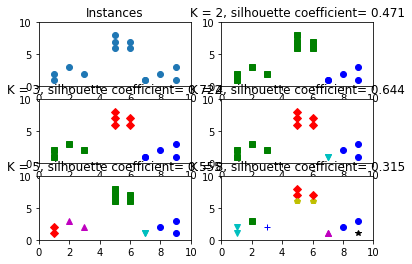

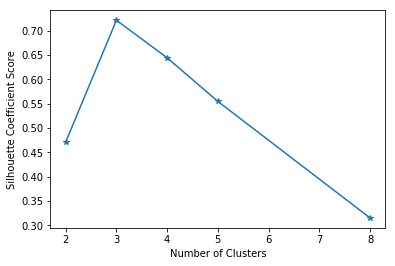

In [372]:
# 导入numpy。
import numpy as np
# 从sklearn.cluster中导入KMeans算法包。
from sklearn.cluster import KMeans
# 从sklearn.metrics导入silhouette_score用于计算轮廓系数。
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 分割出3*2=6个子图，并在1号子图作图。
plt.subplot(3,2,1)

# 初始化原始数据点。
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

# 在1号子图做出原始数据点阵的分布。
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
#         print(i , l)
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

# 绘制轮廓系数与不同类簇数量的直观显示图。
    plt.title('K = %s, silhouette coefficient= %0.03f' %(t, sc_score))
    
    
# 绘制轮廓系数与不同类簇数量的关系曲线。
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()


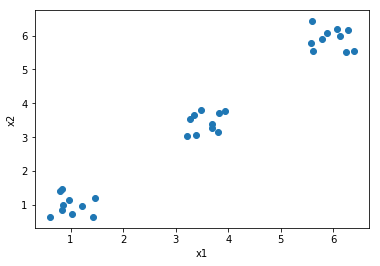

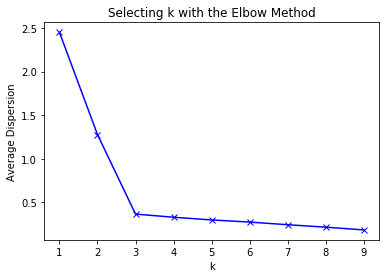

In [398]:
# 导入必要的工具包。
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# 使用均匀分布函数随机三个簇，每个簇周围10个数据样本。
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2,10))
# print(cluster2)
# 绘制30个数据样本的分布图像。
# print(np.hstack((cluster1, cluster2, cluster3)))
X = np.hstack((cluster1, cluster2, cluster3)).T

# print(X)
plt.scatter(X[:,0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# 测试9种不同聚类中心数量下，每种情况的聚类质量，并作图。
K = range(1, 10)
meandistortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()


### 特征降维 - 主成分分析- Principal Component Analysis

In [403]:
# 导入numpy工具包。
import numpy as np
# 初始化一个2*2的线性相关矩阵。
M = np.array([[1, 2], [2, 4]])
# 计算2*2线性相关矩阵的秩。
print(np.linalg.matrix_rank(M, tol=None))


M = np.array([[1, 2,1], [2, 4,1]])
# 计算2*2线性相关矩阵的秩。
print(np.linalg.matrix_rank(M, tol=None))

1
2


In [406]:
# 导入pandas用于数据读取和处理。
import pandas as pd

# 从互联网读入手写体图片识别任务的训练数据，存储在变量digits_train中。
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)

# 从互联网读入手写体图片识别任务的测试数据，存储在变量digits_test中。
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)



[ 12.44580351  16.52024605 -18.84671509 -12.87472955  21.09451297
  -1.98491967  -5.77750138  -3.85738505   7.41163389   9.28295955]
[ True  True False False False False False False  True False False False
 False False False  True False False False False]
[12.44580351 16.52024605  7.41163389 10.68235326 16.24071372 16.83968497
 13.08786838  9.67591482 15.9699374  18.52506579 19.83211814 19.76543171
 10.47564753 15.64273982 17.66311554 13.73742031 22.04494145 19.08938314
 21.15810332 12.02788996  5.47648803 15.54420695 17.44359573 16.09789686
  8.0749879  17.47044651 10.34710005 12.22041098  1.76402901 12.44979199
  8.78943703 11.16807875  3.34107612 13.02647923 13.06514104  6.375528
 13.98763192 13.80509287 11.10460681 14.75005068 15.99642238 10.92043443
 14.21292754 14.96402654 15.80278483 11.58631067 13.26078099  8.81867024
 13.52098463 10.06310894 11.43712659 12.05546014 13.32246748 16.36644365
 13.00450428 12.61045246 15.27098435  9.97835018 17.39067383  7.73371062
 18.08861051 11.

c:\python36-32\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\python36-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\python36-32\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\python36-32\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


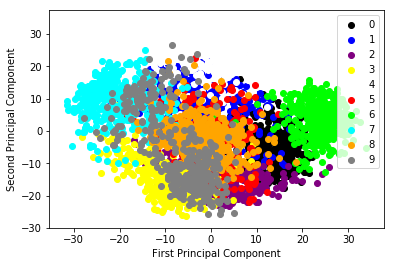

In [423]:

# 分割训练数据的特征向量和标记。
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

# 从sklearn.decomposition导入PCA。
from sklearn.decomposition import PCA

# 初始化一个可以将高维度特征向量（64维）压缩至2个维度的PCA。
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

# 显示10类手写体数字图片经PCA压缩后的2维空间分布。
from matplotlib import pyplot as plt


def plot_pca_scatter():
   colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
   print(X_pca[:, 0][:10])
   # 注意看True的位置，进行筛选，根据i，一次将一种颜色的数据全部筛选出来
   a = y_digits.as_matrix() == 0
   print(a[:20])
   print(X_pca[:, 0][y_digits.as_matrix() == 0])
   for i in range(len(colors)):
      px = X_pca[:, 0][y_digits.as_matrix() == i]
      py = X_pca[:, 1][y_digits.as_matrix() == i]
      plt.scatter(px, py, c=colors[i])

   plt.legend(np.arange(0, 10).astype(str))
   plt.xlabel('First Principal Component')
   plt.ylabel('Second Principal Component')
   plt.show()


plot_pca_scatter()

In [424]:
# 对训练数据、测试数据进行特征向量（图片像素）与分类目标的分隔。
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 导入基于线性核的支持向量机分类器。
from sklearn.svm import LinearSVC

# 使用默认配置初始化LinearSVC，对原始64维像素特征的训练数据进行建模，并在测试数据上做出预测，存储在y_predict中。
svc = LinearSVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

# 使用PCA将原64维的图像数据压缩到20个维度。
estimator = PCA(n_components=20)
# 利用训练特征决定（fit）20个正交维度的方向，并转化（transform）原训练特征。
pca_X_train = estimator.fit_transform(X_train)
# 测试特征也按照上述的20个正交维度方向进行转化（transform）。
pca_X_test = estimator.transform(X_test)

# 使用默认配置初始化LinearSVC，对压缩过后的20维特征的训练数据进行建模，并在测试数据上做出预测，存储在pca_y_predict中。
pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)


c:\python36-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [425]:
# 从sklearn.metrics导入classification_report用于更加细致的分类性能分析。
from sklearn.metrics import classification_report

# 对使用原始图像高维像素特征训练的支持向量机分类器的性能作出评估。
print (svc.score(X_test, y_test))
print (classification_report(y_test, y_predict, target_names=np.arange(10).astype(str)))

# 对使用PCA压缩重建的低维图像特征训练的支持向量机分类器的性能作出评估。
print (pca_svc.score(pca_X_test, y_test))
print (classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str)))


0.9304396215915415
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.90      0.88      0.89       182
           2       0.97      0.98      0.97       177
           3       0.97      0.89      0.93       183
           4       0.95      0.97      0.96       181
           5       0.89      0.97      0.93       182
           6       0.99      0.98      0.98       181
           7       0.98      0.91      0.94       179
           8       0.86      0.86      0.86       174
           9       0.83      0.89      0.86       180

   micro avg       0.93      0.93      0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797

0.9143016138007791
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       178
           1       0.87      0.78      0.82       182
           2       0.91      0.96      0

# Chapter-3

## 特征提升

### 特征抽取（DictVectorizer CountVectorizer TfidVectorizer）

In [430]:
# 定义一组字典列表，用来表示多个数据样本（每个字典代表一个数据样本）。
measurements = [{
    'city': 'Dubai',
    'temperature': 33.
}, {
    'city': 'London',
    'temperature': 12.
}, {
    'city': 'San Fransisco',
    'temperature': 18.
}, {
    'city': 'xxx',
    'temperature': 99.
}, {
    'city': 'xxx',
    'temperature': 55.
}]
# 从sklearn.feature_extraction 导入 DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# 初始化DictVectorizer特征抽取器
vec = DictVectorizer()
# 输出转化之后的特征矩阵。
print(vec.fit_transform(measurements).toarray())
# 输出各个维度的特征含义。
print(vec.get_feature_names())

[[ 1.  0.  0.  0. 33.]
 [ 0.  1.  0.  0. 12.]
 [ 0.  0.  1.  0. 18.]
 [ 0.  0.  0.  1. 99.]
 [ 0.  0.  0.  1. 55.]]
['city=Dubai', 'city=London', 'city=San Fransisco', 'city=xxx', 'temperature']


In [1]:
# 从sklearn.datasets里导入20类新闻文本数据抓取器。
from sklearn.datasets import fetch_20newsgroups
# 从互联网上即时下载新闻样本,subset='all'参数代表下载全部近2万条文本存储在变量news中。
news = fetch_20newsgroups(subset='all')



In [3]:

# 从sklearn.cross_validation导入train_test_split模块用于分割数据集。
from sklearn.model_selection import train_test_split
# 对news中的数据data进行分割，25%的文本用作测试集；75%作为训练集。
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=33)

# 从sklearn.feature_extraction.text里导入CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# 采用默认的配置对CountVectorizer进行初始化（默认配置不去除英文停用词），并且赋值给变量count_vec。
count_vec = CountVectorizer()

# 只使用词频统计的方式将原始训练和测试文本转化为特征向量。
# print(X_train[0])
X_count_train = count_vec.fit_transform(X_train)
X_count_test = count_vec.transform(X_test)

print("--------------")
print(type(news.target_names))
## 一共有20个分类
import pandas as pd
print(pd.Series(news.target_names).value_counts())
print(pd.Series(news.target).value_counts())


# 从sklearn.naive_bayes里导入朴素贝叶斯分类器。
from sklearn.naive_bayes import MultinomialNB
# 使用默认的配置对分类器进行初始化。
mnb_count = MultinomialNB()
# 使用朴素贝叶斯分类器，对CountVectorizer（不去除停用词）后的训练样本进行参数学习。
mnb_count.fit(X_count_train, y_train)

# 输出模型准确性结果。
print ('The accuracy of classifying 20newsgroups using Naive Bayes (CountVectorizer without filtering stopwords):', mnb_count.score(X_count_test, y_test))
# 将分类预测的结果存储在变量y_count_predict中。
y_count_predict = mnb_count.predict(X_count_test)
# 从sklearn.metrics 导入 classification_report。
from sklearn.metrics import classification_report
# 输出更加详细的其他评价分类性能的指标。
print (classification_report(y_test, y_count_predict, target_names = news.target_names))

--------------
<class 'list'>
rec.sport.hockey            1
comp.os.ms-windows.misc     1
alt.atheism                 1
sci.electronics             1
misc.forsale                1
comp.sys.mac.hardware       1
sci.space                   1
comp.windows.x              1
rec.motorcycles             1
talk.politics.guns          1
comp.graphics               1
sci.med                     1
talk.religion.misc          1
comp.sys.ibm.pc.hardware    1
talk.politics.mideast       1
sci.crypt                   1
rec.autos                   1
rec.sport.baseball          1
talk.politics.misc          1
soc.religion.christian      1
dtype: int64
10    999
15    997
8     996
9     994
11    991
13    990
7     990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
dtype: int64
The accuracy of classifying 20newsgroups using Naive Bayes (CountVectorizer without filtering stopwords): 0.8397707979626485
                   

In [4]:
# 从sklearn.feature_extraction.text里分别导入TfidfVectorizer。
from sklearn.feature_extraction.text import TfidfVectorizer
# 采用默认的配置对TfidfVectorizer进行初始化（默认配置不去除英文停用词），并且赋值给变量tfidf_vec。
tfidf_vec = TfidfVectorizer()

# 使用tfidf的方式，将原始训练和测试文本转化为特征向量。
X_tfidf_train = tfidf_vec.fit_transform(X_train)
X_tfidf_test = tfidf_vec.transform(X_test)

# 依然使用默认配置的朴素贝叶斯分类器，在相同的训练和测试数据上，对新的特征量化方式进行性能评估。
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_tfidf_train, y_train)
print ('The accuracy of classifying 20newsgroups with Naive Bayes (TfidfVectorizer without filtering stopwords):', mnb_tfidf.score(X_tfidf_test, y_test))

y_tfidf_predict = mnb_tfidf.predict(X_tfidf_test)
print (classification_report(y_test, y_tfidf_predict, target_names=news.target_names))

The accuracy of classifying 20newsgroups with Naive Bayes (TfidfVectorizer without filtering stopwords): 0.8463497453310697
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.67      0.75       201
           comp.graphics       0.85      0.74      0.79       250
 comp.os.ms-windows.misc       0.82      0.85      0.83       248
comp.sys.ibm.pc.hardware       0.76      0.88      0.82       240
   comp.sys.mac.hardware       0.94      0.84      0.89       242
          comp.windows.x       0.96      0.84      0.89       263
            misc.forsale       0.93      0.69      0.79       257
               rec.autos       0.84      0.92      0.88       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.96      0.91      0.94       251
        rec.sport.hockey       0.88      0.99      0.93       233
               sci.crypt       0.73      0.98      0.83       238
         sci.elec

In [7]:
# 继续沿用代码56与代码57中导入的工具包（在同一份源代码中，或者不关闭解释器环境），分别使用停用词过滤配置初始化CountVectorizer与TfidfVectorizer。
count_filter_vec, tfidf_filter_vec = CountVectorizer(analyzer='word', stop_words='english'), TfidfVectorizer(analyzer='word', stop_words='english')

# 使用带有停用词过滤的CountVectorizer对训练和测试文本分别进行量化处理。
X_count_filter_train = count_filter_vec.fit_transform(X_train)
X_count_filter_test = count_filter_vec.transform(X_test)

# 使用带有停用词过滤的TfidfVectorizer对训练和测试文本分别进行量化处理。
X_tfidf_filter_train = tfidf_filter_vec.fit_transform(X_train)
X_tfidf_filter_test = tfidf_filter_vec.transform(X_test)

# 初始化默认配置的朴素贝叶斯分类器，并对CountVectorizer后的数据进行预测与准确性评估。
mnb_count_filter = MultinomialNB()
mnb_count_filter.fit(X_count_filter_train, y_train)
print('The accuracy of classifying 20newsgroups using Naive Bayes (CountVectorizer by filtering stopwords):', mnb_count_filter.score(X_count_filter_test, y_test))
y_count_filter_predict = mnb_count_filter.predict(X_count_filter_test) 

# 初始化另一个默认配置的朴素贝叶斯分类器，并对TfidfVectorizer后的数据进行预测与准确性评估。
mnb_tfidf_filter = MultinomialNB()
mnb_tfidf_filter.fit(X_tfidf_filter_train, y_train)
print ('The accuracy of classifying 20newsgroups with Naive Bayes (TfidfVectorizer by filtering stopwords):', mnb_tfidf_filter.score(X_tfidf_filter_test, y_test))
y_tfidf_filter_predict = mnb_tfidf_filter.predict(X_tfidf_filter_test)

# 对上述两个模型进行更加详细的性能评估。
from sklearn.metrics import classification_report
print (classification_report(y_test, y_count_filter_predict, target_names = news.target_names))
print (classification_report(y_test, y_tfidf_filter_predict, target_names = news.target_names))


The accuracy of classifying 20newsgroups using Naive Bayes (CountVectorizer by filtering stopwords): 0.8637521222410866
The accuracy of classifying 20newsgroups with Naive Bayes (TfidfVectorizer by filtering stopwords): 0.8826400679117148
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.89      0.87       201
           comp.graphics       0.62      0.88      0.73       250
 comp.os.ms-windows.misc       0.93      0.22      0.36       248
comp.sys.ibm.pc.hardware       0.62      0.88      0.73       240
   comp.sys.mac.hardware       0.93      0.85      0.89       242
          comp.windows.x       0.82      0.85      0.84       263
            misc.forsale       0.90      0.79      0.84       257
               rec.autos       0.91      0.91      0.91       238
         rec.motorcycles       0.98      0.94      0.96       276
      rec.sport.baseball       0.98      0.92      0.95       251
        rec.sport.hockey       0.9

### 特征筛选

In [10]:
# 导入pandas并且更名为pd。
import pandas as pd
# 从互联网读取titanic数据。
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

474


In [18]:
print(titanic.head())
print(type(titanic))
# 分离数据特征与预测目标。
y = titanic['survived']
X = titanic.drop(['row.names', 'name', 'survived'], axis = 1)
print(X.head())


# 对对缺失数据进行填充。
X['age'].fillna(X['age'].mean(), inplace=True)
X.fillna('UNKNOWN', inplace=True)

# 分割数据，依然采样25%用于测试。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# 类别型特征向量化。
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

# 输出处理后特征向量的维度。
print (len(vec.feature_names_))

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

In [19]:
# 使用决策树模型依靠所有特征进行预测，并作性能评估。
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.8145896656534954

In [25]:
# 从sklearn导入特征筛选器。
from sklearn import feature_selection
# 筛选前20%的特征，使用相同配置的决策树模型进行预测，并且评估性能。
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)


0.8206686930091185

In [29]:
# 通过交叉验证（下一节将详细介绍）的方法，按照固定间隔的百分比筛选特征，并作图展示性能随特征筛选比例的变化。
from sklearn.model_selection import cross_val_score
import numpy as np

percentiles = range(1, 100, 2)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())
print(results)

# 找到提现最佳性能的特征筛选的百分比。
opt = np.where(results == results.max())[0]
print(opt)
print('Optimal number of features %d' %percentiles[opt[0]])


[0.85063904 0.85673057 0.87501546 0.88622964 0.8608019  0.87201608
 0.86794475 0.86894455 0.86692435 0.86996496 0.87098536 0.86794475
 0.86592455 0.86588332 0.86284271 0.8618223  0.86586271 0.86487322
 0.86284271 0.8608019  0.86385281 0.86284271 0.86792414 0.86692435
 0.86689342 0.86895485 0.87403628 0.86691404 0.86589363 0.86689342
 0.86790353 0.86692435 0.86486291 0.86997526 0.87096475 0.86995465
 0.86993403 0.87402597 0.86792414 0.87402597 0.86996496 0.86690373
 0.86489384 0.87098536 0.86384251 0.8608122  0.86387343 0.86590394
 0.85676149 0.86286333]
[3]
Optimal number of features 7


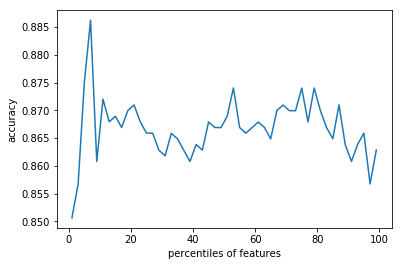

In [31]:
import matplotlib.pyplot as plt
plt.plot(percentiles, results)
plt.xlabel('percentiles of features')
plt.ylabel('accuracy')
plt.show()


### 模型正则化

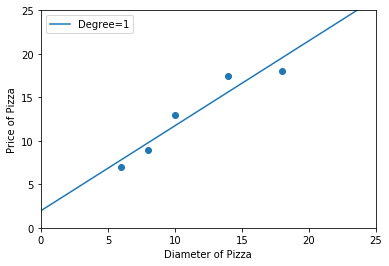

The R-squared value of Linear Regressor performing on the training data is 0.9100015964240102


In [41]:
# 输入训练样本的特征以及目标值，分别存储在变量X_train与y_train之中。
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]

# 从sklearn.linear_model中导入LinearRegression。
from sklearn.linear_model import LinearRegression
# 使用默认配置初始化线性回归模型。
regressor = LinearRegression()
# 直接以披萨的直径作为特征训练模型。
regressor.fit(X_train, y_train)

# 导入numpy并且重命名为np。
import numpy as np
# 在x轴上从0至25均匀采样100个数据点。
xx = np.linspace(0, 26, 100)
# print(xx)
xx = xx.reshape(xx.shape[0], 1)
# print(xx)
# 以上述100个数据点作为基准，预测回归直线。
yy = regressor.predict(xx)
# print(yy)

# 对回归预测到的直线进行作图。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt1, = plt.plot(xx, yy, label="Degree=1")
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1])
plt.show()

# 输出线性回归模型在训练样本上的R-squared值。 
print ('The R-squared value of Linear Regressor performing on the training data is', regressor.score(X_train, y_train))


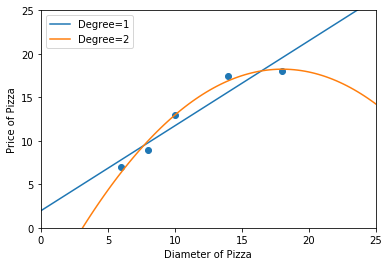

The R-squared value of Polynominal Regressor (Degree=2) performing on the training data is 0.9816421639597427


In [46]:
# 从sklearn.preproessing中导入多项式特征产生器
from sklearn.preprocessing import PolynomialFeatures
# 使用PolynominalFeatures(degree=2)映射出2次多项式特征，存储在变量X_train_poly2中。
poly2 = PolynomialFeatures(degree=2)
# print(X_train)
X_train_poly2 = poly2.fit_transform(X_train)
# print(X_train_poly2)

# 以线性回归器为基础，初始化回归模型。尽管特征的维度有提升，但是模型基础仍然是线性模型。
regressor_poly2 = LinearRegression()

# 对2次多项式回归模型进行训练。
regressor_poly2.fit(X_train_poly2, y_train)

# 从新映射绘图用x轴采样数据。
xx_poly2 = poly2.transform(xx)
# print(xx_poly2)

# 使用2次多项式回归模型对应x轴采样数据进行回归预测。
yy_poly2 = regressor_poly2.predict(xx_poly2)

# 分别对训练数据点、线性回归直线、2次多项式回归曲线进行作图。
plt.scatter(X_train, y_train)

plt1, = plt.plot(xx, yy, label='Degree=1')
plt2, = plt.plot(xx, yy_poly2, label='Degree=2')

plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1, plt2])
plt.show()

# 输出2次多项式回归模型在训练样本上的R-squared值。 
print ('The R-squared value of Polynominal Regressor (Degree=2) performing on the training data is', regressor_poly2.score(X_train_poly2, y_train))


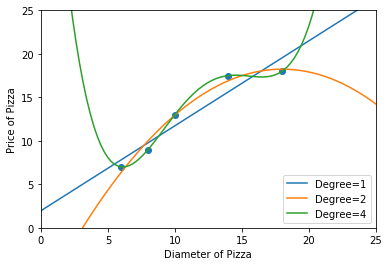

The R-squared value of Polynominal Regressor (Degree=4) performing on the training data is 1.0


In [47]:
# 从sklearn.preprocessing导入多项式特征生成器。 
from sklearn.preprocessing import PolynomialFeatures
# 初始化4次多项式特征生成器。 
poly4 = PolynomialFeatures(degree=4)

X_train_poly4 = poly4.fit_transform(X_train)

# 使用默认配置初始化4次多项式回归器。 
regressor_poly4 = LinearRegression()
# 对4次多项式回归模型进行训练。
regressor_poly4.fit(X_train_poly4, y_train)

# 从新映射绘图用x轴采样数据。
xx_poly4 = poly4.transform(xx)
# 使用4次多项式回归模型对应x轴采样数据进行回归预测。
yy_poly4 = regressor_poly4.predict(xx_poly4)

# 分别对训练数据点、线性回归直线、2次多项式以及4次多项式回归曲线进行作图。
plt.scatter(X_train, y_train)
plt1, = plt.plot(xx, yy, label='Degree=1')
plt2, = plt.plot(xx, yy_poly2, label='Degree=2')

plt4, = plt.plot(xx, yy_poly4, label='Degree=4')
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter of Pizza')
plt.ylabel('Price of Pizza')
plt.legend(handles = [plt1, plt2, plt4])
plt.show()

print ('The R-squared value of Polynominal Regressor (Degree=4) performing on the training data is',regressor_poly4.score(X_train_poly4, y_train))


In [48]:
# 准备测试数据。
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]


In [49]:
# 使用测试数据对线性回归模型的性能进行评估。
regressor.score(X_test, y_test)

0.809726797707665

In [50]:
# 使用测试数据对2次多项式回归模型的性能进行评估。
X_test_poly2 = poly2.transform(X_test)
regressor_poly2.score(X_test_poly2, y_test)


0.8675443656345054

In [51]:
# 使用测试数据对4次多项式回归模型的性能进行评估。
X_test_poly4 = poly4.transform(X_test)
regressor_poly4.score(X_test_poly4, y_test)

0.8095880795856146

### L1范数正则化